## Import functions

In [9]:
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD, CRD, DCD2, PDB_small
from MDAnalysis.analysis import distances,diffusionmap, align, rms,contacts,dihedrals, encore
from MDAnalysis.analysis.rms import RMSF
import MDAnalysis.analysis.pca as pca
#import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from mpl_toolkits.axisartist.parasite_axes import SubplotHost
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
from itertools import product
import timeit
import time
import math
import os.path
import seaborn as sns
import pandas as pd
import csv
import sklearn
import scipy as sp
from scipy.stats import entropy
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial import Voronoi,voronoi_plot_2d
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import csv
from matplotlib.colors import to_rgb
from matplotlib.collections import PolyCollection
from matplotlib.legend_handler import HandlerTuple
import scipy.signal as sig
from scipy.stats import gaussian_kde
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import glob

## Define paths to systems; create universes

In [165]:
project_path = '/Users/javingfun/Library/CloudStorage/OneDrive-UCSanDiego/UCSD_PhD/Projects/Mpro_MD_dry'

#apo path
apo_path = os.path.join(project_path,'mpro_apo')

apo_monomer_path = os.path.join(apo_path,'mpro_apo_monomer')
apo_dimer_path = os.path.join(apo_path,'mpro_apo_dimer')

#ens_path
ens_path = os.path.join(project_path,'mpro_ens')

ens_monomer_path = os.path.join(ens_path,'mpro_ens_monomer')
ens_dimer_path = os.path.join(ens_path,'mpro_ens_dimer')
ens_dimer_asym_path = os.path.join(ens_path,'mpro_ens_dimer_asym')

#nirm_path
nirm_path = os.path.join(project_path,'mpro_nirm')

nirm_monomer_path = os.path.join(nirm_path,'mpro_nirm_monomer')
nirm_dimer_path = os.path.join(nirm_path,'mpro_nirm_dimer')
nirm_dimer_asym_path = os.path.join(nirm_path,'mpro_nirm_dimer_asym')

#nat_path
nat_path = os.path.join(project_path,'mpro_nat')

nat_monomer_path = os.path.join(nat_path,'mpro_nat_monomer')
nat_dimer_path = os.path.join(nat_path,'mpro_nat_dimer')
nat_dimer_asym_path = os.path.join(nat_path,'mpro_nat_dimer_asym')

In [166]:
def make_universe(path,replica):
    
    #obtain trajectory and topology from file, create a universe
    if replica == 0:
        topology = glob.glob(os.path.join(path,'*.pdb'))
        u = mda.Universe(topology[0])
        
    
    else:
        topology = glob.glob(os.path.join(path,'*.prmtop'))
        trajectory = glob.glob(os.path.join(path, '*{rep}.nc'.format(rep=replica))) 
        u = mda.Universe(topology[0], trajectory[0])
        
    return u

In [167]:
def combine_universe(path):
    #obtain trajectory and topology from file, create a universe

    topology = glob.glob(os.path.join(path,'*.prmtop'))
    trajectory = glob.glob(os.path.join(path, '*.nc')) 

    u = mda.Universe(topology[0], trajectory[0], trajectory[1], trajectory[2])
        
    return u

In [168]:
print(combine_universe(apo_monomer_path).trajectory)

<ChainReader containing mpro_apo_monomer_prod_aligned_dry_1.nc, mpro_apo_monomer_prod_aligned_dry_3.nc, mpro_apo_monomer_prod_aligned_dry_2.nc with 3000 frames of 4682 atoms>


In [170]:
#apo 
am_0 = make_universe(apo_monomer_path,0)
am_1 = make_universe(apo_monomer_path,1)
am_2 = make_universe(apo_monomer_path,2)
am_3 = make_universe(apo_monomer_path,3)
am_4 = combine_universe(apo_monomer_path)

ad_0 = make_universe(apo_dimer_path,0)
ad_1 = make_universe(apo_dimer_path,1)
ad_2 = make_universe(apo_dimer_path,2)
ad_3 = make_universe(apo_dimer_path,3)
ad_4 = combine_universe(apo_dimer_path)

am_list = [am_1,am_2,am_3]
ad_list = [ad_1,ad_2,ad_3]

#ens 
em_0 = make_universe(ens_monomer_path,0)
em_1 = make_universe(ens_monomer_path,1)
em_2 = make_universe(ens_monomer_path,2)
em_3 = make_universe(ens_monomer_path,3)
em_4 = combine_universe(ens_monomer_path)

ed_0 = make_universe(ens_dimer_path,0)
ed_1 = make_universe(ens_dimer_path,1)
ed_2 = make_universe(ens_dimer_path,2)
ed_3 = make_universe(ens_dimer_path,3)
ed_4 = combine_universe(ens_dimer_path)

ea_0 = make_universe(ens_dimer_asym_path,0)
ea_1 = make_universe(ens_dimer_asym_path,1)
ea_2 = make_universe(ens_dimer_asym_path,2)
ea_3 = make_universe(ens_dimer_asym_path,3)
ea_4 = combine_universe(ens_dimer_asym_path)

em_list = [em_1,em_2,em_3]
ed_list = [ed_1,ed_2,ed_3]
ea_list = [ea_1,ea_2,ea_3]

#nirm monomer
nm_0 = make_universe(nirm_monomer_path,0)
nm_1 = make_universe(nirm_monomer_path,1)
nm_2 = make_universe(nirm_monomer_path,2)
nm_3 = make_universe(nirm_monomer_path,3)
nm_4 = combine_universe(nirm_monomer_path)

nd_0 = make_universe(nirm_dimer_path,0)
nd_1 = make_universe(nirm_dimer_path,1)
nd_2 = make_universe(nirm_dimer_path,2)
nd_3 = make_universe(nirm_dimer_path,3)
nd_4 = combine_universe(nirm_dimer_path)

#asymmetric dimer has ligand on B
na_0 = make_universe(nirm_dimer_asym_path,0)
na_1 = make_universe(nirm_dimer_asym_path,1)
na_2 = make_universe(nirm_dimer_asym_path,2)
na_3 = make_universe(nirm_dimer_asym_path,3)
na_4 = combine_universe(nirm_dimer_asym_path)

nm_list = [nm_1,nm_2,nm_3]
nd_list = [nd_1,nd_2,nd_3]
na_list = [na_1,na_2,na_3]

#nat monomer
pm_0 = make_universe(nat_monomer_path,0)
pm_1 = make_universe(nat_monomer_path,1)
pm_2 = make_universe(nat_monomer_path,2)
pm_3 = make_universe(nat_monomer_path,3)
pm_4 = combine_universe(nat_monomer_path)

pd_0 = make_universe(nat_dimer_path,0)
pd_1 = make_universe(nat_dimer_path,1)
pd_2 = make_universe(nat_dimer_path,2)
pd_3 = make_universe(nat_dimer_path,3)
pd_4 = combine_universe(nat_dimer_path)

pa_0 = make_universe(nat_dimer_asym_path,0)
pa_1 = make_universe(nat_dimer_asym_path,1)
pa_2 = make_universe(nat_dimer_asym_path,2)
pa_3 = make_universe(nat_dimer_asym_path,3)
pa_4 = combine_universe(nat_dimer_asym_path)

pm_list = [pm_1,pm_2,pm_3]
pd_list = [pd_1,pd_2,pd_3]
pa_list = [pa_1,pa_2,pa_3]

## Create selections

In [171]:
selection_a = {'protomer':'protein and resid 1-306 and name CA', #protomer
               'domain1':'protein and resid 1-101 and name CA', #domain I
               'domain2':'protein and resid 102-184 and name CA', #domain II
               'idl':'protein and resid 185-200 and name CA', #IDL loop
               'domain3':'protein and resid 201-306 and name CA', #domain III
               'interface_ss':'protein and resid 1-14 109-172 290-306 and name CA'} #interface SS

selection_b = {'protomer':'protein and resid 307-612 and name CA', #protomer
               'domain1':'protein and resid 307-407 and name CA', #domain I
               'domain2':'protein and resid 408-490 and name CA', #domain II
               'idl':'protein and resid 491-506 and name CA', #IDL loop
               'domain3':'protein and resid 507-612 and name CA', #domain III
               'interface_ss':'protein and resid 307-320 415-478 596-612 and name CA'} #interface SS

def get_b(a):
    return a + 306

def make_range_selection(start,stop):  
        return f"protein and resid {get_b(start)}-{get_b(stop)} and name CA"

sel_dict = {'protomer':[1,306],
            'domain1':[1,101],'domain2':[102,184],
            'idl':[185,200],'domain3':[201,306],
           'interface_ss':[1,14,109,172,290,306]}

for key,value in sel_dict.items():
    if len(value) == 2:
        start = value[0]
        stop = value[1]
        sel_b = make_range_selection(start,stop)
        print(value)
    else:
        pass

[1, 306]
[1, 101]
[102, 184]
[185, 200]
[201, 306]


In [172]:
def calc_pca(u,sel_dict):
    
    #create dictionary to store pca results per selection
    pca_dict = {}
    
    #iterate over selecitons and calculate pca for each iteraction, appending to dictionary
    for key,value in sel_dict.items():
        selection = value
        print(key,value)
        PSF_pca=pca.PCA(u, select=selection)
        PSF_pca.run()
        n_pcs = np.where(PSF_pca.cumulated_variance > 0.95)[0][0]
        atomgroup = u.select_atoms(selection)
        pca_space = PSF_pca.transform(atomgroup, n_components=n_pcs)
        
        pca_dict[key] = pca_space
        
    return(pca_dict)

## Apo PCA

In [226]:
apo_monomer_pca = calc_pca(am_4,selection_a)
apo_dimer_a_pca = calc_pca(ad_4,selection_a)
apo_dimer_b_pca = calc_pca(ad_4,selection_b)

protomer protein and resid 1-306 and name CA


/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/pca.py:337: DeprecationWarning: The `cumulated_variance` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.cumulated_variance` instead.
  warnings.warn(wmsg, DeprecationWarning)


domain1 protein and resid 1-101 and name CA
domain2 protein and resid 102-184 and name CA
idl protein and resid 185-200 and name CA
domain3 protein and resid 201-306 and name CA
interface_ss protein and resid 1-14 109-172 290-306 and name CA
protomer protein and resid 1-306 and name CA
domain1 protein and resid 1-101 and name CA
domain2 protein and resid 102-184 and name CA
idl protein and resid 185-200 and name CA
domain3 protein and resid 201-306 and name CA
interface_ss protein and resid 1-14 109-172 290-306 and name CA
protomer protein and resid 307-612 and name CA
domain1 protein and resid 307-407 and name CA
domain2 protein and resid 408-490 and name CA
idl protein and resid 491-506 and name CA
domain3 protein and resid 507-612 and name CA
interface_ss protein and resid 307-320 415-478 596-612 and name CA


### Apo Protomer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


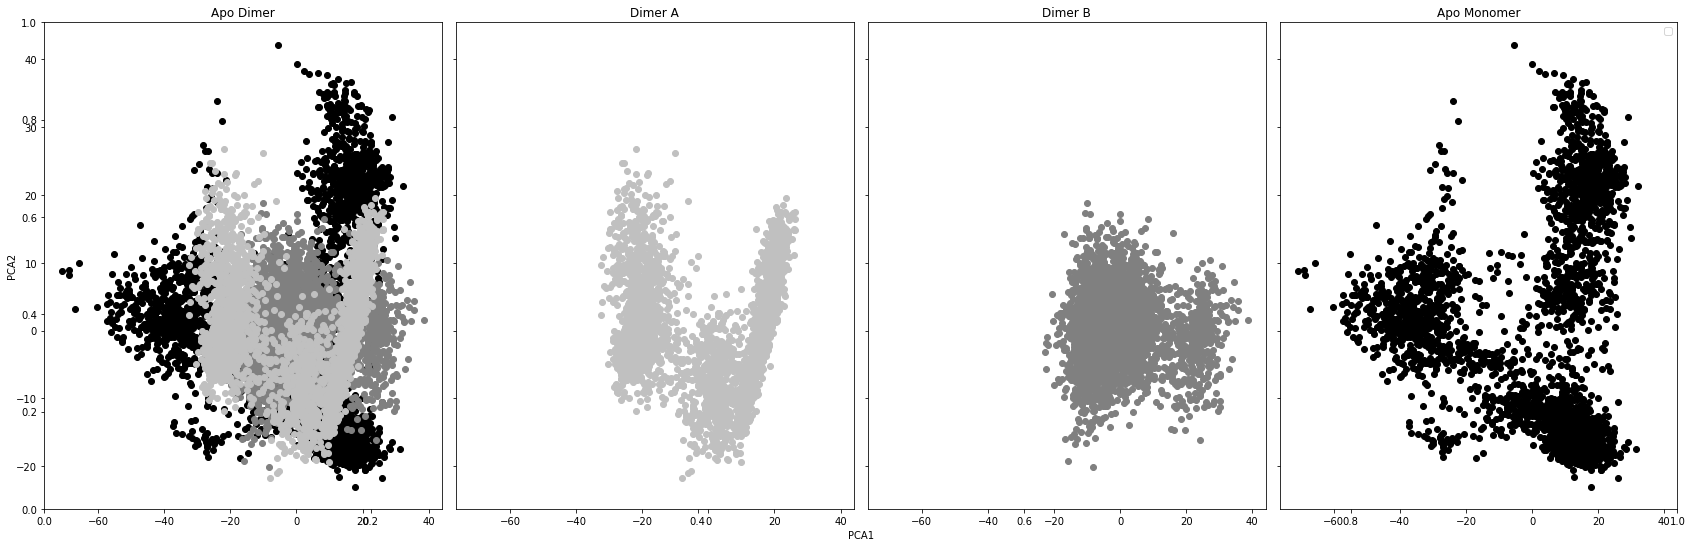

In [222]:
apo_monomer_pca_sel = apo_monomer_pca['protomer']
apo_dimer_a_pca_sel = apo_dimer_a_pca['protomer']
apo_dimer_b_pca_sel = apo_dimer_b_pca['protomer']

apo_pca = apo_dimer_a_pca_sel[:,0].tolist() + apo_dimer_b_pca_sel[:,0].tolist() + apo_monomer_pca_sel[:,0].tolist() 

fig, axs = plt.subplots(1,4, sharex=True, sharey=True, tight_layout=True, figsize=(24,8))
fig.add_subplot(111, frameon=False)

axs[0].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[0].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[0].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[0].set_title("Apo Dimer")

axs[1].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[1].set_title("Dimer A")

axs[2].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[2].set_title("Dimer B")

axs[3].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[3].set_title("Apo Monomer")



plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
#plt.title('Apo Dimer PCA: Full Protomer')

### Apo Domain I

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


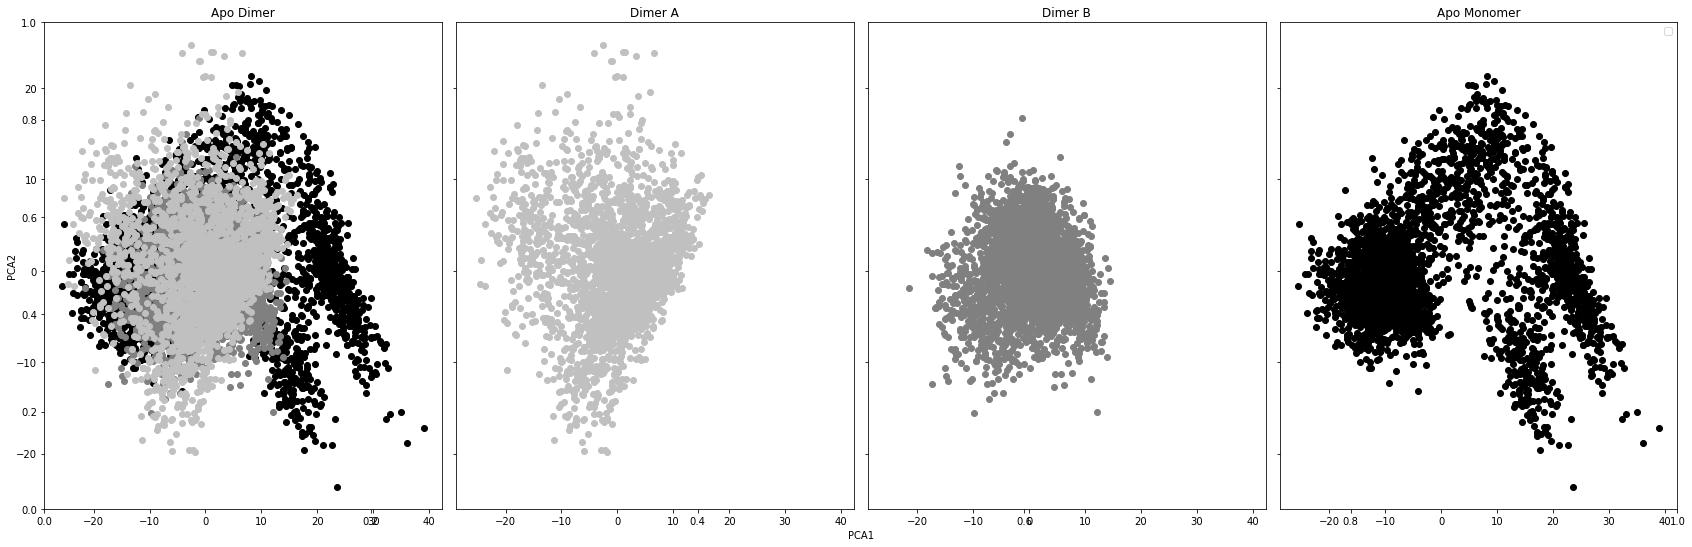

In [221]:
apo_monomer_pca_sel = apo_monomer_pca['domain1']
apo_dimer_a_pca_sel = apo_dimer_a_pca['domain1']
apo_dimer_b_pca_sel = apo_dimer_b_pca['domain1']

apo_pca = apo_dimer_a_pca_sel[:,0].tolist() + apo_dimer_b_pca_sel[:,0].tolist() + apo_monomer_pca_sel[:,0].tolist() 

fig, axs = plt.subplots(1,4, sharex=True, sharey=True, tight_layout=True, figsize=(24,8))
fig.add_subplot(111, frameon=False)

axs[0].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[0].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[0].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[0].set_title("Apo Dimer")

axs[1].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[1].set_title("Dimer A")

axs[2].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[2].set_title("Dimer B")

axs[3].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[3].set_title("Apo Monomer")



plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
#plt.title('Apo Dimer PCA: Full Protomer')

### Apo Domain II

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


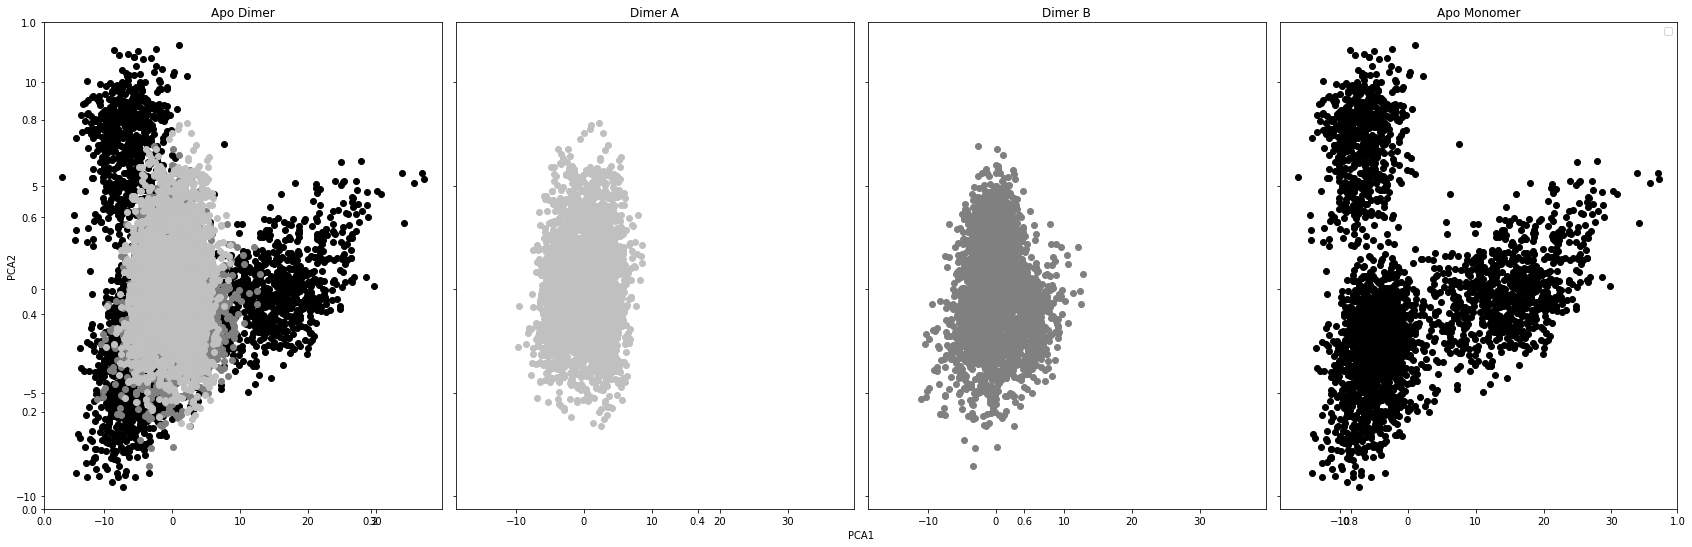

In [220]:
apo_monomer_pca_sel = apo_monomer_pca['domain2']
apo_dimer_a_pca_sel = apo_dimer_a_pca['domain2']
apo_dimer_b_pca_sel = apo_dimer_b_pca['domain2']

apo_pca = apo_dimer_a_pca_sel[:,0].tolist() + apo_dimer_b_pca_sel[:,0].tolist() + apo_monomer_pca_sel[:,0].tolist() 

fig, axs = plt.subplots(1,4, sharex=True, sharey=True, tight_layout=True, figsize=(24,8))
fig.add_subplot(111, frameon=False)

axs[0].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[0].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[0].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[0].set_title("Apo Dimer")

axs[1].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[1].set_title("Dimer A")

axs[2].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[2].set_title("Dimer B")

axs[3].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[3].set_title("Apo Monomer")



plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
#plt.title('Apo Dimer PCA: Full Protomer')

### Apo Domain III

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


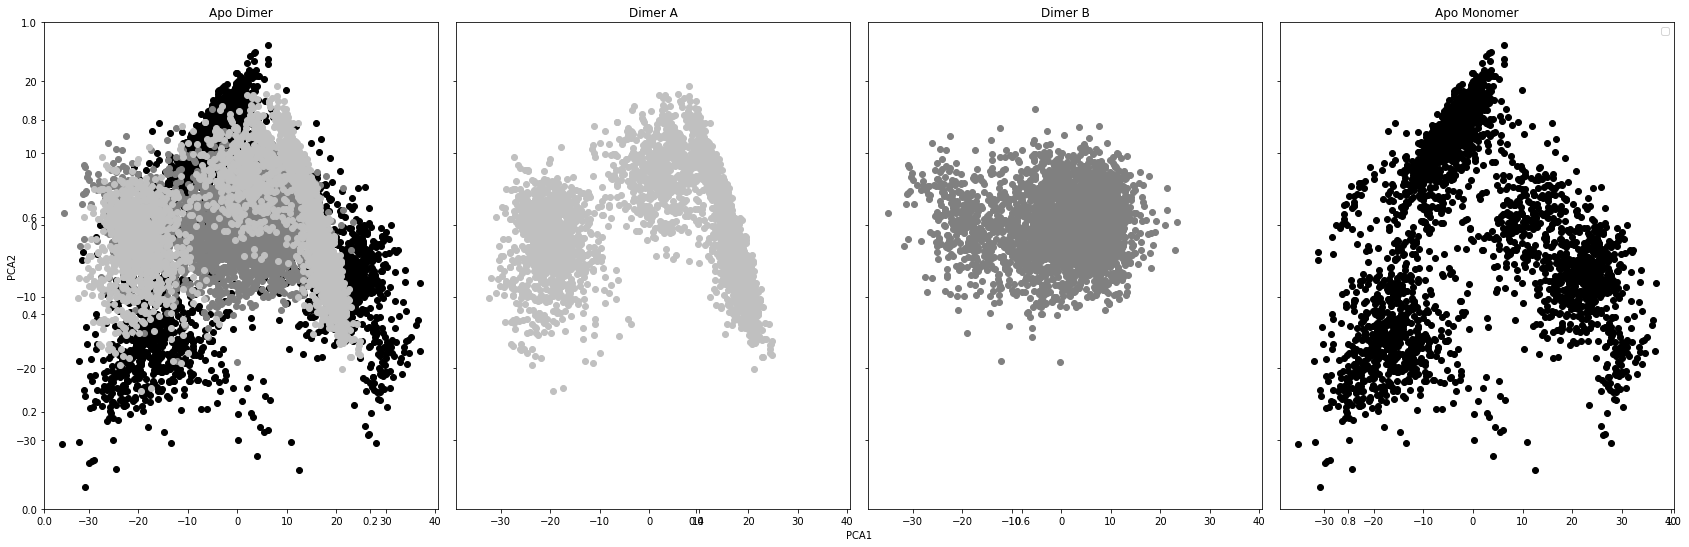

In [223]:
apo_monomer_pca_sel = apo_monomer_pca['domain3']
apo_dimer_a_pca_sel = apo_dimer_a_pca['domain3']
apo_dimer_b_pca_sel = apo_dimer_b_pca['domain3']

apo_pca = apo_dimer_a_pca_sel[:,0].tolist() + apo_dimer_b_pca_sel[:,0].tolist() + apo_monomer_pca_sel[:,0].tolist() 

fig, axs = plt.subplots(1,4, sharex=True, sharey=True, tight_layout=True, figsize=(24,8))
fig.add_subplot(111, frameon=False)

axs[0].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[0].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[0].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[0].set_title("Apo Dimer")

axs[1].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[1].set_title("Dimer A")

axs[2].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[2].set_title("Dimer B")

axs[3].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[3].set_title("Apo Monomer")



plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
#plt.title('Apo Dimer PCA: Full Protomer')

### Apo IDL

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


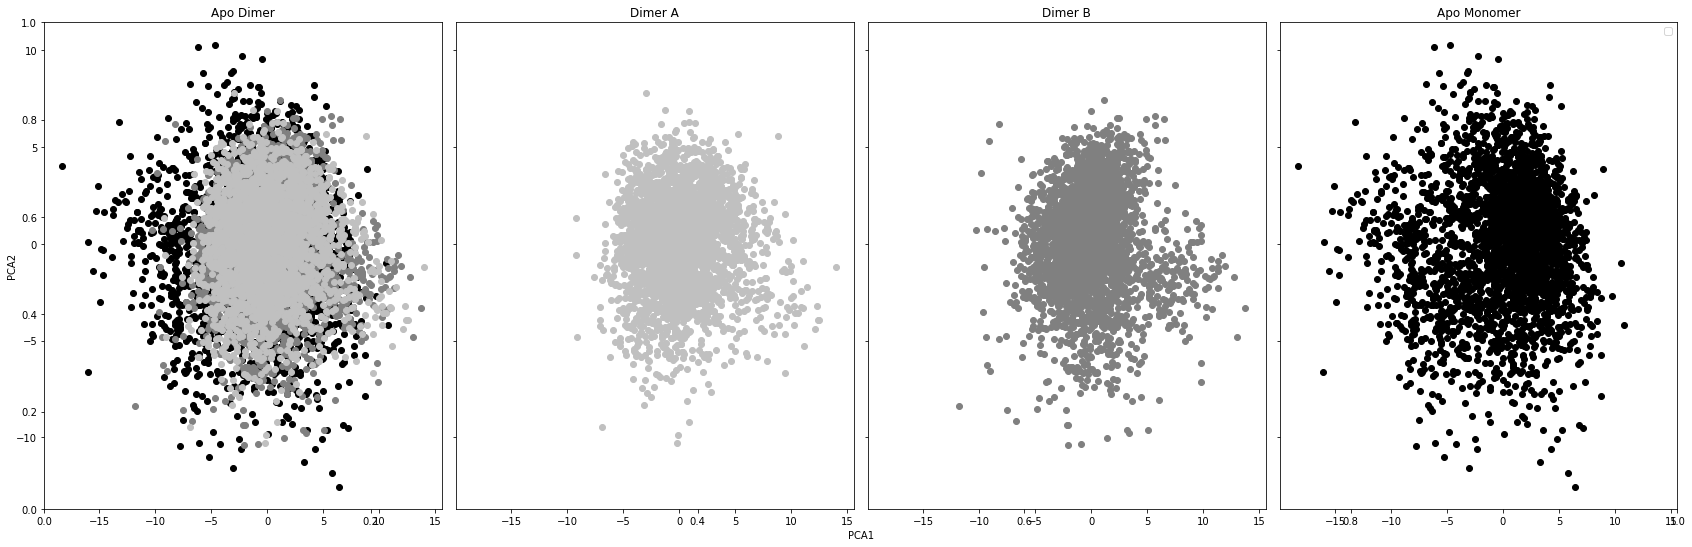

In [224]:
apo_monomer_pca_sel = apo_monomer_pca['idl']
apo_dimer_a_pca_sel = apo_dimer_a_pca['idl']
apo_dimer_b_pca_sel = apo_dimer_b_pca['idl']

apo_pca = apo_dimer_a_pca_sel[:,0].tolist() + apo_dimer_b_pca_sel[:,0].tolist() + apo_monomer_pca_sel[:,0].tolist() 

fig, axs = plt.subplots(1,4, sharex=True, sharey=True, tight_layout=True, figsize=(24,8))
fig.add_subplot(111, frameon=False)

axs[0].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[0].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[0].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[0].set_title("Apo Dimer")

axs[1].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[1].set_title("Dimer A")

axs[2].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[2].set_title("Dimer B")

axs[3].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[3].set_title("Apo Monomer")



plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
#plt.title('Apo Dimer PCA: Full Protomer')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


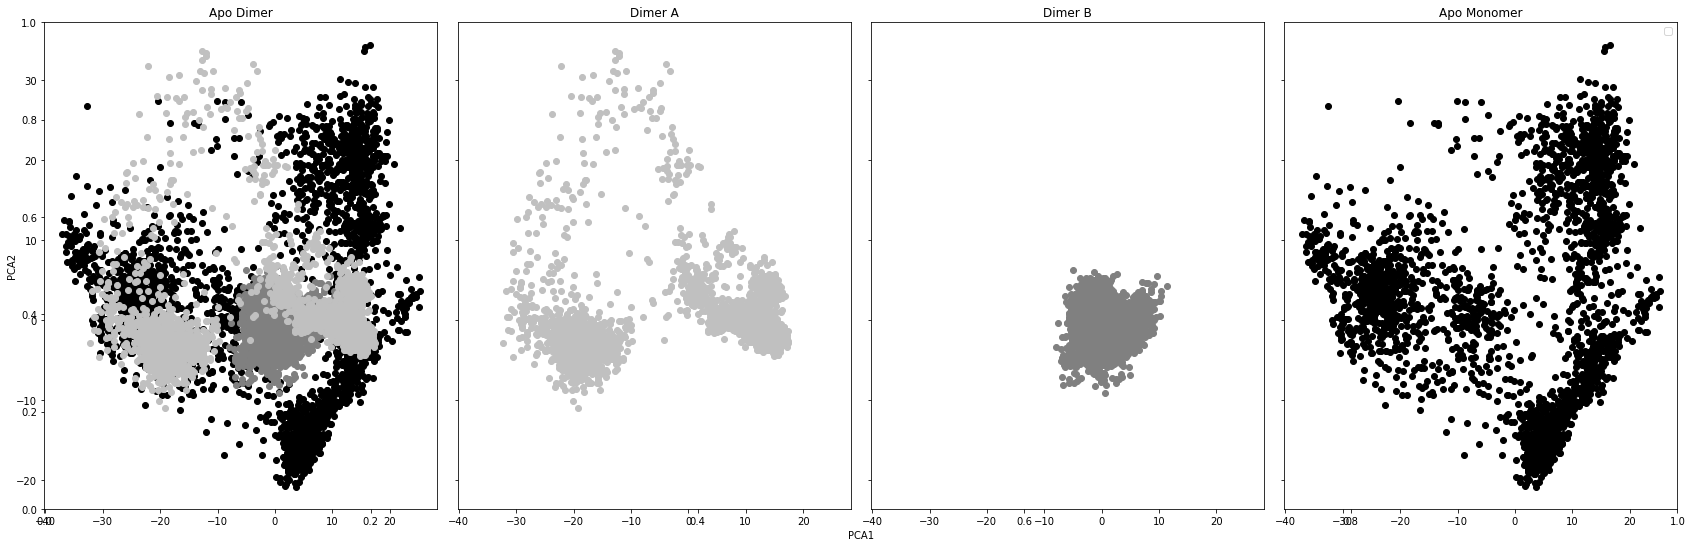

In [225]:
apo_monomer_pca_sel = apo_monomer_pca['interface_ss']
apo_dimer_a_pca_sel = apo_dimer_a_pca['interface_ss']
apo_dimer_b_pca_sel = apo_dimer_b_pca['interface_ss']

apo_pca = apo_dimer_a_pca_sel[:,0].tolist() + apo_dimer_b_pca_sel[:,0].tolist() + apo_monomer_pca_sel[:,0].tolist() 

fig, axs = plt.subplots(1,4, sharex=True, sharey=True, tight_layout=True, figsize=(24,8))
fig.add_subplot(111, frameon=False)

axs[0].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[0].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[0].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[0].set_title("Apo Dimer")

axs[1].scatter(apo_dimer_a_pca_sel[:,0],apo_dimer_a_pca_sel[:,1],color='silver',label='Chain A')
axs[1].set_title("Dimer A")

axs[2].scatter(apo_dimer_b_pca_sel[:,0],apo_dimer_b_pca_sel[:,1],color='gray',label='Chain B')
axs[2].set_title("Dimer B")

axs[3].scatter(apo_monomer_pca_sel[:,0],apo_monomer_pca_sel[:,1],color='black',label='Monomer')
axs[3].set_title("Apo Monomer")



plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
#plt.title('Apo Dimer PCA: Full Protomer')

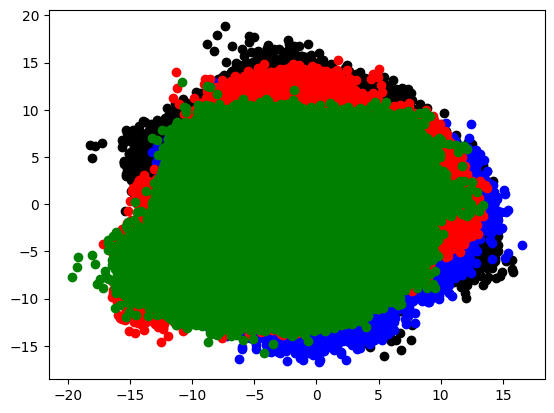

In [11]:
plt.scatter(wta_pca[:,0],wta_pca[:,1],color='k')
plt.scatter(wtb_pca[:,0],wtb_pca[:,1],color='k')
plt.scatter(dma_pca[:,0],dma_pca[:,1],color='b')
plt.scatter(dmb_pca[:,0],dmb_pca[:,1],color='b')
plt.scatter(delP168a_pca[:,0],delP168a_pca[:,1],color='r')
plt.scatter(delP168b_pca[:,0],delP168b_pca[:,1],color='r')
plt.scatter(a173va_pca[:,0],a173va_pca[:,1],color='g')
plt.scatter(a173vb_pca[:,0],a173vb_pca[:,1],color='g')

In [ ]:
plot_scatter(wt_pca,dm_pca)

In [10]:
def plot_scatter(wta,wtb,dma,dmb,delP168a,delP168b,a173va,a173vb,title):
    params = {
        #'font.family': 'sans-serif',
        #'font.sans-serif': 'Arial',
         'legend.fontsize': '36',
         #'figure.figsize': (24,12),
         'axes.labelsize': '40',
         'axes.titlesize': '40',
         'xtick.labelsize': '24',
         'ytick.labelsize': '24'
         #'xtick.size': '30'
         #'ytick.size': '30'
    }
    
    pylab.rcParams.update(params)
    
    left,width=0.1,0.65
    bottom,height=0.1,0.65
    spacing=0.005
    
    rect_scatter=[left,bottom,width,height]
    rect_histx=[left,bottom+height+spacing,width,0.2]
    rect_histy=[left+width+spacing,bottom,0.2,width]
    
    fig=plt.figure(figsize=(12,12))
    
    ax=fig.add_axes(rect_scatter)
    ax_histx=fig.add_axes(rect_histx,sharex=ax)
    ax_histy=fig.add_axes(rect_histy,sharey=ax)
    
    ax_histx.tick_params(axis="x",labelbottom=False)
    ax_histy.tick_params(axis="y",labelbottom=False)
    
    ## plot a_XXX's together
    ax.scatter(wta,wtb,color='black',alpha=0.8)
    ax.scatter(dma,dmb,color='blue',alpha=0.8)
    ax.scatter(delP168a,delP168b,color='red',alpha=0.8)
    ax.scatter(a173va,a173vb,color='green',alpha=0.8)
    
    bins_x=np.arange(-20,20,0.5).tolist()
    bins_y=np.arange(-20,20,0.5).tolist()
    ax_histx.hist(wta,bins_x,color='k',alpha=0.8)
    ax_histy.hist(wtb,bins_y,orientation='horizontal',color='k',alpha=0.8)
    ax_histx.hist(dma,bins_x,color='b',alpha=0.8)
    ax_histy.hist(dmb,bins_y,orientation='horizontal',color='b',alpha=0.8)
    ax_histx.hist(delP168a,bins_x,color='r',alpha=0.8)
    ax_histy.hist(delP168b,bins_y,orientation='horizontal',color='r',alpha=0.8)
    ax_histx.hist(a173va,bins_x,color='g',alpha=0.8)
    ax_histy.hist(a173vb,bins_y,orientation='horizontal',color='g',alpha=0.8)
    
    ax.set_ylabel("P$_0$")
    ax.set_xlabel("P$_1$")
    
    plt.savefig('pca_scatter.png'.format(title),bbox_inches='tight',dpi=300)

/home/fiona_amaro/anaconda3/envs/mdaenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/fiona_amaro/anaconda3/envs/mdaenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/fiona_amaro/anaconda3/envs/mdaenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

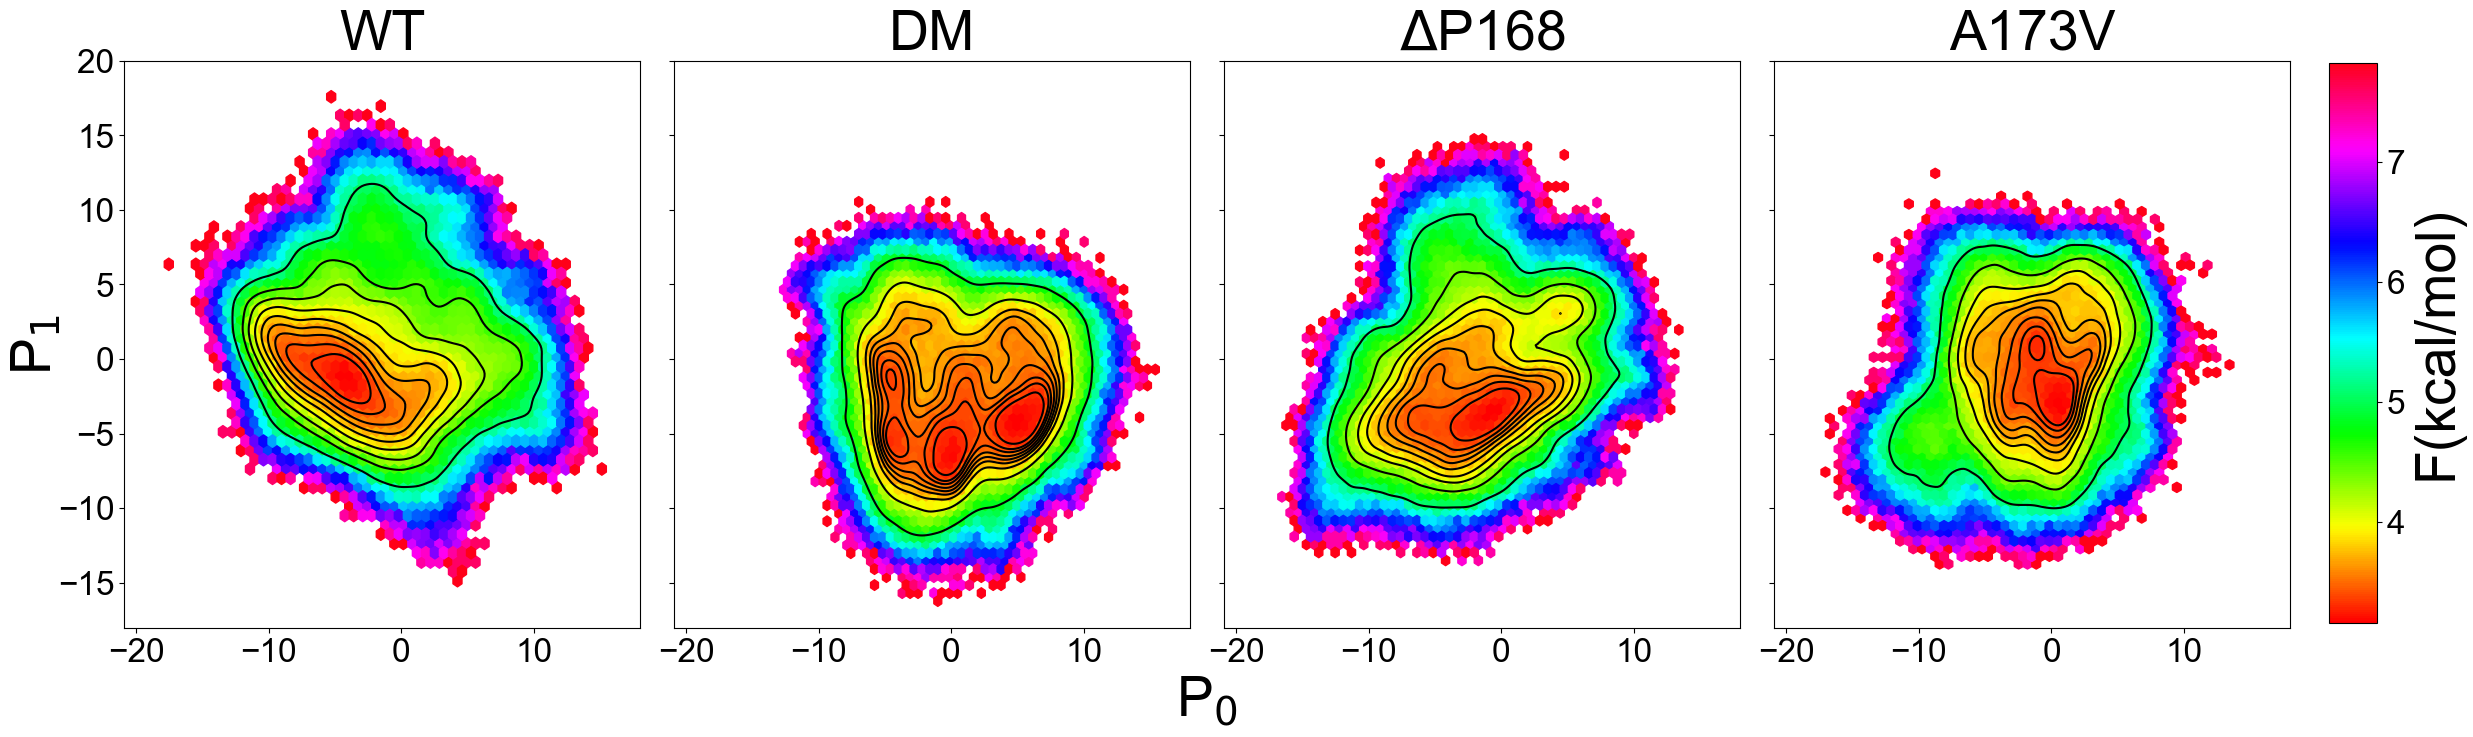

In [43]:
params = {
         'font.family': 'sans-serif',
         'font.sans-serif': 'Arial',
         'legend.fontsize': '36',
         #'figure.figsize': (24,12),
         'axes.labelsize': '40',
         'axes.titlesize': '40',
         'xtick.labelsize': '24',
         'ytick.labelsize': '24'
         #'xtick.size': '30'
         #'ytick.size': '30'
}
pylab.rcParams.update(params)

tot=len(wt_pca0)
count=[1]*tot
#k=sp.constants.k
#T=310

def reduce_C_function(x):
    k=sp.constants.k
    T=310
    avo=sp.constants.Avogadro
    #return(-np.log(np.sum(x)/tot)*0.5922)
    #return(-k*avo*T*np.log(np.sum(x)/tot))
    return(-k*T*avo*np.log(np.sum(x)/tot)/4.184/1000)

#fig = plt.figure(figsize=(12,8))
fig, axs = plt.subplots(1,4, sharex=True, sharey=True, tight_layout=True, figsize=(24,8))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

im=axs[0].hexbin(wt_pca0,wt_pca1,count,reduce_C_function=reduce_C_function,mincnt=1,gridsize=50,cmap='hsv')
sns.kdeplot(wt_pca0,wt_pca1,color='k',legend="Test",common_norm=True,ax=axs[0])
#axs[0].hexbin(wt_all[:,4],wt_all[:,7],ec='white',zorder=2)
#axs[0].set_xlim([0,12])
#axs[0].set_ylim([0,12])
axs[0].set_title("WT")
axs[1].hexbin(dm_pca0,dm_pca1,count,reduce_C_function=reduce_C_function,mincnt=1,gridsize=50,cmap='hsv')
sns.kdeplot(dm_pca0,dm_pca1,color='k',legend="Test",common_norm=True,ax=axs[1])
#axs[1].set_xlim([0,12])
#axs[1].set_ylim([0,12])
axs[1].set_title("DM")
axs[2].hexbin(delP168_pca0,delP168_pca1,count,reduce_C_function=reduce_C_function,mincnt=1,gridsize=50,cmap='hsv')
sns.kdeplot(delP168_pca0,delP168_pca1,color='k',legend="Test",common_norm=True,ax=axs[2])
#axs[2].set_xlim([0,12])
#axs[2].set_ylim([0,12])
axs[2].set_title("$\Delta$P168")
axs[3].hexbin(a173v_pca0,a173v_pca1,count,reduce_C_function=reduce_C_function,mincnt=1,gridsize=50,cmap='hsv')
sns.kdeplot(a173v_pca0,a173v_pca1,color='k',legend="Test",common_norm=True,ax=axs[3])
#axs[3].set_xlim([0,12])
#axs[3].set_ylim([0,12])
axs[3].set_title("A173V")

plt.xlabel("P$_0$")
plt.ylabel("P$_1$")

cbar_ax=fig.add_axes([1.0,0.2,0.02,0.7])
fig.colorbar(im,cax=cbar_ax,label="F(kcal/mol)")
fig.tight_layout()
plt.savefig('{}_pca_free_energy.png'.format("wt_dm_delP168_a173v"),bbox_inches='tight',dpi=300)

/home/fiona_amaro/anaconda3/envs/mdaenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: >

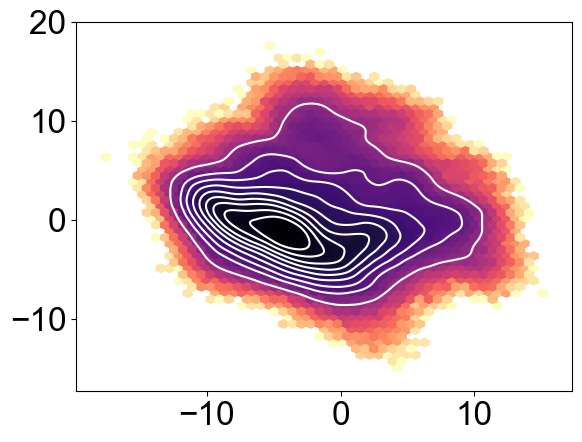

In [32]:
plt.hexbin(wt_pca0,wt_pca1,count,reduce_C_function=reduce_C_function,mincnt=1,gridsize=50,cmap='magma')
sns.kdeplot(wt_pca0,wt_pca1,color='white',legend="Test")

/home/fiona_amaro/anaconda3/envs/mdaenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


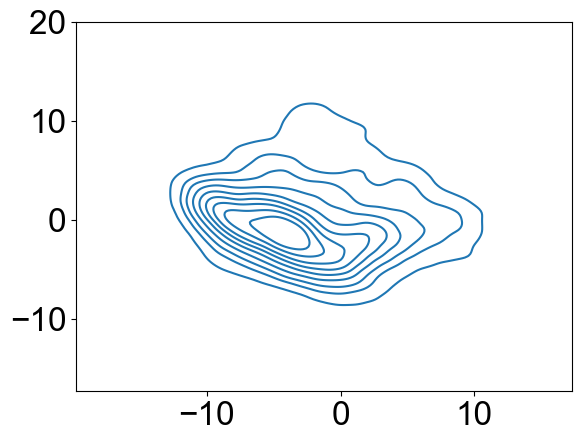

In [31]:
fig2=sns.kdeplot(wt_pca0,wt_pca1,legend="Test")

In [6]:
PSF_pca=pca.PCA(u_wt_chaina, select='name CA')

In [7]:
PSF_pca.run()

/home/fiona_amaro/anaconda3/envs/mdaenv/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [22]:
n_pcs = np.where(PSF_pca.cumulated_variance > 0.95)[0][0]

In [23]:
atomgroup = u_wt_chaina.select_atoms("name CA")

In [24]:
pca_space = PSF_pca.transform(atomgroup, n_components=n_pcs)

In [25]:
print(len(pca_space[0]))

107


In [26]:
print(n_pcs)

107


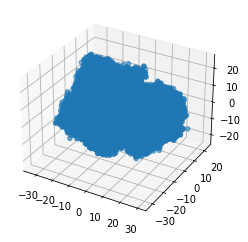

In [34]:
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_space[:,0],pca_space[:,1],pca_space[:,2])

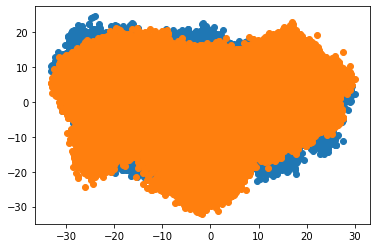

In [36]:
plt.scatter(pca_space[:,0],pca_space[:,2])
plt.scatter(pca_space[:,0],pca_space[:,1])

In [33]:
len(pca_space[:,2])

330000

In [41]:
def calc_pocket(u):
    coors=[]
    pocket=u.select_atoms("protein and resid 24-28 39-50 116-119 141-147 167 171-175 186-192 and name CA")
    natoms=len(pocket)
    for ts in u.trajectory:
        coors.append(pocket.positions)
    #coors=np.array(coors).reshape(natoms)
    return(coors)

In [42]:
wta=calc_pocket(u_wt_chaina)
wtb=calc_pocket(u_wt_chainb)
dma=calc_pocket(u_dm_chaina)
dmb=calc_pocket(u_dm_chainb)
delP168a=calc_pocket(u_delP168_chaina)
delP168b=calc_pocket(u_delP168_chainb)
a173va=calc_pocket(u_a173v_chaina)
a173vb=calc_pocket(u_a173v_chainb)

In [53]:
all_data=wta+wtb+dma+dmb+delP168a+delP168b+a173va+a173vb

In [54]:
print(len(all_data))

2640000


In [48]:
print(len(wta[0]))

41


In [ ]:
n_components=3

In [62]:
pca=sklearn.decomposition.PCA(n_components=9)

In [63]:
pca.fit(all_data)

ValueError: Found array with dim 3. Estimator expected <= 2.